Lecture 12- Spring 2023
Villas-Boas

This notebook does the following:

Measuring amenities, hedonic model

Standardizing

Functional forms

Selection x var, models, adjusted R squared

Study Ch 6.1 + 6.3

Today starts the material after the Midterm

---------
Midterm review topics posted on bcourses, with tables for midterm
Practice Midterm posted, with solutions and formula sheet posted
Quiz 3 includes material for midterm, has been posted. Quiz 4 already material for after midterm



In [24]:
# Load the 'pacman' package
library(pacman) 
#packages to use load them now using the pacman "manager"
p_load(dplyr, haven, readr) 
#Another great feature of p_load(): if you try to load a package that is not installed on your machine, p_load() install the package for you, rather than throwing an error. For instance, let’s install and load one final package named ggplot2. 
p_load(ggplot2)

pacman::p_load(lfe, lmtest, haven, sandwich, tidyverse)
pacman::p_load(lfe, lmtest, haven, sandwich, tidyverse,psych,car)
# lfe for running fixed effects regression
# lmtest for displaying robust SE in output table
# haven for loading in dta files
# sandwich for producing robust Var-Cov matrix
# tidyverse for manipulating data and producing plots

In [15]:
#set scientific display off, thank you Roy
options(scipen=999)

In [16]:
#read in a Stata dataset
my_data <- read_dta("Lecture13HPRICE2.dta")
head(my_data)

price,crime,nox,rooms,dist,radial,proptax,stratio,ppoverty,lprice,lnox,lproptax
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085809,1.682688,5.690360
21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938
34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454495,1.545433,5.488938
33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416311,1.521699,5.402678
36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496787,1.521699,5.402678
28701,0.030,4.58,6.43,6.06,3,22.2,18.7,5.21,10.264688,1.521699,5.402678



 
 
 Source:  D. Harrison and D.L. Rubinfeld (1978), "Hedonic Housing Prices and the Demand for Clean Air," 
Journal of Environmental Economics and Management 5, 81-102. (data Lecture13Hprice2.dta in bcourses)
Unit of analysis census tract in the Boston area – Most data 1970 U.S. Census.  
The data below were obtained by merging/ matching average house prices and characteristics by census tract 
(1 to 6 ) with crime (census) levels  and pollution (variable 7) levels from another source.
1. price           median housing price, $
2. crime           crimes committed per capita
3. ppoverty         % of people in poverty'
4. rooms           avg number of rooms per house
5. dist            weighted dist. to 5 employ centers
6. stratio         average student-teacher ratio
7. nox             nitrous oxide, parts per 100 million.  (EPA standard 5.3)


In [17]:
#***summary stats of the data : price nox crime dist rooms ppoverty stratio

#summary stats of data 
#one way describes all data:
describe(my_data)

ERROR: Error in describe(my_data): could not find function "describe"


In [18]:
#to describe only a subset
data2<-cbind(my_data$price,my_data$nox,my_data$crime,my_data$dist,my_data$rooms,my_data$ppoverty,my_data$stratio)

##Renaming first four columns columns
colnames(data2) <- c("price", "nox", "crime", "dist", "rooms", "ppoverty", "stratio")

describe(data2)

ERROR: Error in describe(data2): could not find function "describe"


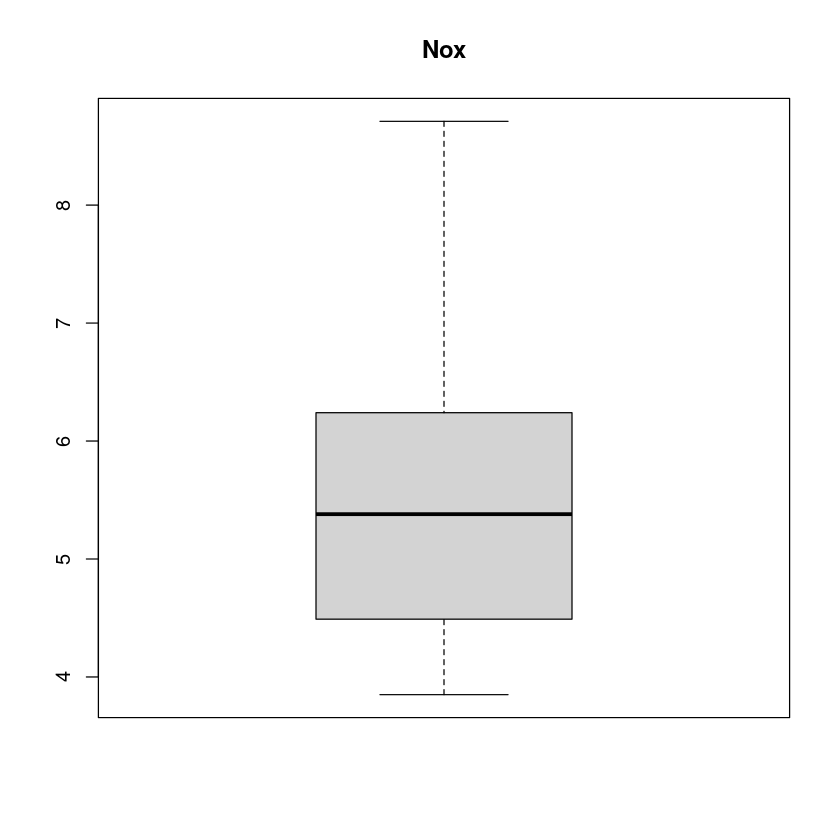

In [19]:
#box plot of NOX
boxplot(my_data$nox, main="Nox" ) 
# box plot for 'nox'

#/*NOX: the variable in measured in parts per 100 mill (pp100m)  nitrogen dioxide
#The   EPA official annual standard is 5.3 ppm
#https://www3.epa.gov/ttn/naaqs/standards/nox/s_nox_history.html 
#*/
#  /*REVIEW for MIDTERM: What do you see in terms of the data standard deviation

#and Max Min of annual NOX in US census tracts?  
#  Variable |        Obs        Mean    Std. Dev.       Min        Max
#nox |        506    5.549783    1.158395       3.85       8.71
#What is the average NOX among the data census tracts? What is standard error of the average?
#  average 5.549783   std dev of average is 1.158395/square_root(506)
#*/
  

In [20]:
reg13 <- lm(price~nox+crime+dist+rooms+ppoverty+stratio, my_data)
summary(reg13)


Call:
lm(formula = price ~ nox + crime + dist + rooms + ppoverty + 
    stratio, data = my_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13163.8  -3004.4   -761.9   1872.2  28594.3 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 34431.70    4732.08   7.276     0.00000000000134 ***
nox         -1757.66     331.46  -5.303     0.00000017173215 ***
crime         -80.58      30.48  -2.644              0.00846 ** 
dist        -1202.37     170.50  -7.052     0.00000000000591 ***
rooms        4412.58     415.85  10.611 < 0.0000000000000002 ***
ppoverty     -519.77      48.42 -10.735 < 0.0000000000000002 ***
stratio      -998.83     115.82  -8.624 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5040 on 499 degrees of freedom
Multiple R-squared:  0.704,	Adjusted R-squared:  0.7005 
F-statistic: 197.8 on 6 and 499 DF,  p-value: < 0.00000000000000022


What do you see in the output of regression above

One particulate increase in nox ceteris paribus, and  price drops by 1757 dollars
One more crime per capita ceteris paribus, and housing price drops by 80 dollars

Do, for yourself, a review for midterm, t test? significance ? pvalues?

In [21]:
#New-------------------------
#But how do we compare the importance of these two factors  that have different means and ranges?
#  Crime 0 to 89 average 3.6  
#nox average 5.5 pp 100 mill and from 3.8 to 8.71?

#standardize the coefficients then, lets write a function
#coefficients:
b <- reg13$coef
X<-cbind(1,my_data$nox,my_data$crime,my_data$dist,my_data$rooms,my_data$ppoverty,my_data$stratio)
sx1<-sd(X[,1])
sx2<-sd(X[,2])
sx3<-sd(X[,3])
sx4<-sd(X[,4])
sx5<-sd(X[,5])
sx6<-sd(X[,6])
sx7<-sd(X[,7])
sx<-cbind(sx1,sx2,sx3,sx4,sx5,sx6,sx7)
sy<-sd(my_data$price)
beta <- b * sx/sy
#pring standardized betas:
beta

sx1,sx2,sx3,sx4,sx5,sx6,sx7
0,-0.2210981,-0.07516394,-0.2749917,0.3366601,-0.4085311,-0.2349146


From the above results we see that

One std dev increase in Nox ceteris paribus, and  price drops by 0.22 standard dev

One std dev increase in crime ceteris paribus, and housing price drops by 0.075 std dev

This is how we compare the importance of these two factors  that have different means and ranges, 
using Z scores and interpreting the standardized betas

In [22]:


#logs specification? log of distance

lprice<-log(my_data$price)
ldist<-log(my_data$dist)
lnox<-log(my_data$nox)

reg13log<-lm(lprice~lnox+rooms+ppoverty+ldist,my_data)
summary(reg13log)


#regress log price distance and distance squared specification 
my_data$dist2<-my_data$dist*my_data$dist
reg13sq<-lm(lprice~nox+crime+dist+dist2+rooms+ppoverty+stratio, my_data)
summary(reg13sq)




Call:
lm(formula = lprice ~ lnox + rooms + ppoverty + ldist, data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9985 -0.1154 -0.0124  0.1128  1.0021 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 10.76614    0.25285  42.579 < 0.0000000000000002 ***
lnox        -0.59334    0.10424  -5.692     0.00000002138236 ***
rooms        0.13537    0.01863   7.265     0.00000000000143 ***
ppoverty    -0.03490    0.00216 -16.161 < 0.0000000000000002 ***
ldist       -0.19174    0.03788  -5.062     0.00000058438597 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2312 on 501 degrees of freedom
Multiple R-squared:  0.6834,	Adjusted R-squared:  0.6809 
F-statistic: 270.4 on 4 and 501 DF,  p-value: < 0.00000000000000022



Call:
lm(formula = lprice ~ nox + crime + dist + dist2 + rooms + ppoverty + 
    stratio, data = my_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72953 -0.10903 -0.01039  0.10005  0.83580 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 11.220529   0.211784  52.981 < 0.0000000000000002 ***
nox         -0.098098   0.014850  -6.606 0.000000000101772783 ***
crime       -0.010501   0.001249  -8.411 0.000000000000000433 ***
dist        -0.122620   0.024146  -5.078 0.000000539002084613 ***
dist2        0.006774   0.002030   3.337              0.00091 ***
rooms        0.113690   0.016665   6.822 0.000000000026135585 ***
ppoverty    -0.028510   0.001944 -14.668 < 0.0000000000000002 ***
stratio     -0.038550   0.004643  -8.302 0.000000000000000969 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2019 on 498 degrees of freedom
Multiple R-squared:  0.7599,	Adjusted R-squared:  0.75

What do you see? 
Which MODEL REGRESSION do we choose in this case?
 
#Adj R squared with ldist  0.68
#Adj R squared with dist and dist2    0.7565

#so you would choose the one with dist and dist 2 
#instead of the one with log distance, because it has the higher adjusted R squared

Take away

if same y and different X's then use adjusted R2 like in this lecture

how do we select between a regression of price on nox or a regression of log price on nox?
different method for model selection, in a future lecture

